Задание 1. Реализовать примеры нечёткого логического вывода Мамдани и Сугено из учебника

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


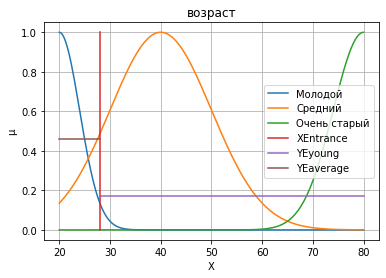

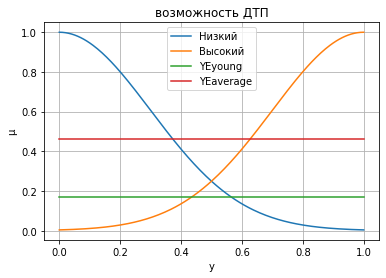

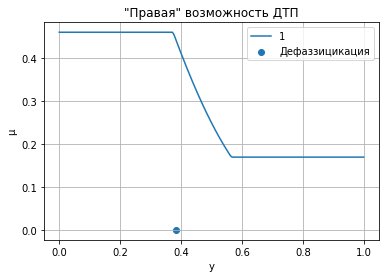

Дефаззицикация: y = 0.38236027774721854


In [ ]:
!pip install fuzzywuzzy
!pip install scikit-fuzzy
import matplotlib.pyplot as plt
import numpy as np
from itertools import repeat
import skfuzzy as fuzz

XEntrance = 28
YEyoung = YEaverage = 0  



x = np.linspace(20, 80, 200)
young = fuzz.gaussmf(x, 20 , 4)
average = fuzz.gaussmf(x, 40 , 10)
vold= fuzz.gaussmf(x, 80 , 6)
old = fuzz.gaussmf(x, 80 , 13)


fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
sbplt.set_ylabel('µ')
sbplt.plot(x, young , label= 'Молодой')
sbplt.plot(x, average , label= 'Средний')
sbplt.plot(x, vold , label= 'Очень старый')
sbplt.plot(np.linspace(XEntrance, XEntrance, 200), np.linspace(0, 1, 200), label = 'XEntrance')

YEyoung = young[(int)((XEntrance - 20) * 200 / 60) - 1]
YEaverage = average[(int)((XEntrance - 20) * 200 / 60) - 1]
sbplt.plot(np.linspace(XEntrance, 80, 200), np.linspace(YEyoung, YEyoung, 200), label = 'YEyoung')
sbplt.plot(np.linspace(20, XEntrance, 200), np.linspace(YEaverage, YEaverage, 200), label = 'YEaverage')
plt.legend()
plt.title('возраст')
plt.show()

x = np.linspace(0, 1, 200)
Low = fuzz.gaussmf(x, 0 , 0.3)
Hight = fuzz.gaussmf(x, 1 , 0.3)

fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('y')
sbplt.set_ylabel('µ')
sbplt.plot(x, Low , label= 'Низкий')
sbplt.plot(x, Hight , label= 'Высокий')
sbplt.plot(np.linspace(0, 1, 200), np.linspace(YEyoung, YEyoung, 200), label = 'YEyoung')
sbplt.plot(np.linspace(0, 1, 200), np.linspace(YEaverage, YEaverage, 200), label = 'YEaverage')
plt.legend()
plt.title('возможность ДТП')
plt.show()

ShearFirst = fuzz.fuzzy_or(x, fuzz.fuzzy_and(x, Low, x, np.linspace(YEaverage, YEaverage, 200))[1] , x, fuzz.fuzzy_and(x, Hight, x, np.linspace(YEyoung, YEyoung, 200))[1])[1]
defuzz = fuzz.defuzz(x, ShearFirst, 'centroid')
fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('y')
sbplt.set_ylabel('µ')
sbplt.plot(x, ShearFirst , label= '1')
plt.scatter(defuzz, 0, label = 'Дефаззицикация')
plt.legend()
plt.title('"Правая" возможность ДТП')
plt.show()

print ('Дефаззицикация: y = ' + (str)(defuzz))

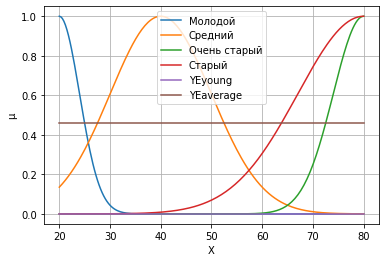

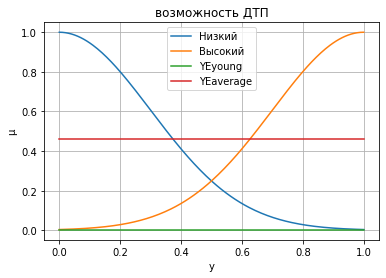

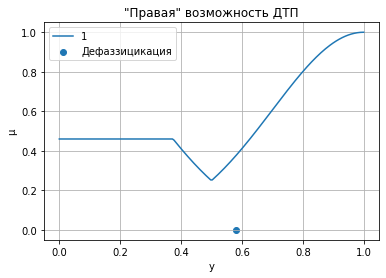

Дефаззицикация: y = 0.5819553422653494


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

x = np.linspace(20, 80, 200)

fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('X')
sbplt.set_ylabel('µ')
sbplt.plot(x, young , label= 'Молодой')
sbplt.plot(x, average , label= 'Средний')
sbplt.plot(x, vold , label= 'Очень старый')
sbplt.plot(x, old , label= 'Cтарый')

eps = 1000
for i in range(0, 200):
  if abs(young[i] - old[i]) <= eps and 0.0 < old[i] < 0.1 :
    eps = abs(young[i] - old[i])
    YEyoung = old[i]
  if abs(average[i] - old[i]) <= eps and 0.1 < old[i] < 0.5:
    eps = abs(average[i] - old[i])
    YEaverage = old[i]

sbplt.plot(x, np.linspace(YEyoung, YEyoung, 200) , label= 'YEyoung')
sbplt.plot(x, np.linspace(YEaverage, YEaverage, 200) , label= 'YEaverage')
plt.legend()

x = np.linspace(0, 1, 200)
Low = fuzz.gaussmf(x, 0 , 0.3)
Hight = fuzz.gaussmf(x, 1 , 0.3)
fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('y')
sbplt.set_ylabel('µ')
sbplt.plot(x, Low , label= 'Низкий')
sbplt.plot(x, Hight , label= 'Высокий')
sbplt.plot(np.linspace(0, 1, 200), np.linspace(YEyoung, YEyoung, 200), label = 'YEyoung')
sbplt.plot(np.linspace(0, 1, 200), np.linspace(YEaverage, YEaverage, 200), label = 'YEaverage')
plt.legend()
plt.title('возможность ДТП')
plt.show()

ShearFirst = fuzz.fuzzy_or(x, fuzz.fuzzy_and(x, Low, x, np.linspace(YEaverage, YEaverage, 200))[1] , x, fuzz.fuzzy_or(x, Hight, x, np.linspace(YEyoung, YEyoung, 200))[1])[1]
defuzz = fuzz.defuzz(x, ShearFirst, 'centroid')
fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('y')
sbplt.set_ylabel('µ')
sbplt.plot(x, ShearFirst , label= '1')
plt.scatter(defuzz, 0, label = 'Дефаззицикация')
plt.legend()
plt.title('"Правая" возможность ДТП')
plt.show()

print ('Дефаззицикация: y = ' + (str)(defuzz))

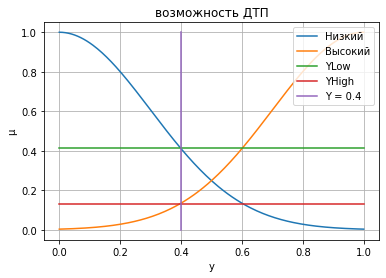

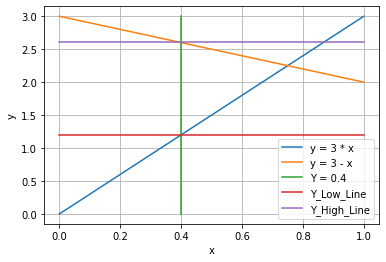

Дефаззицикация: y = 1.5319314820328824


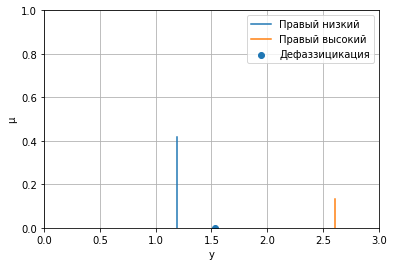

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

XEntrance = 0.4

x = np.linspace(0, 1, 200)
Low = fuzz.gaussmf(x, 0 , 0.3)
High = fuzz.gaussmf(x, 1 , 0.3)
YLow = Low[(int)(XEntrance * 200 - 1)]
YHigh = High[(int)(XEntrance * 200 - 1)]


fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('y')
sbplt.set_ylabel('µ')
sbplt.plot(x, Low , label= 'Низкий')
sbplt.plot(x, High , label= 'Высокий')
sbplt.plot(np.linspace(0, 1, 200), np.linspace(YLow, YLow, 200), label = 'YLow')
sbplt.plot(np.linspace(0, 1, 200), np.linspace(YHigh, YHigh, 200), label = 'YHigh')
sbplt.plot(np.linspace(XEntrance, XEntrance, 200), np.linspace(0, 1, 200), label = 'Y = 0.4')
plt.legend()
plt.title('возможность ДТП')
plt.show()


Low_Line = np.array(list(map(lambda t: 3*t, x)))
High_Line = np.array(list(map(lambda t: 3-t, x)))

Y_Low_Line = Low_Line[(int)(XEntrance*200) - 1]
Y_High_Line = High_Line[(int)(XEntrance*200) - 1]

fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('x')
sbplt.set_ylabel('y')
sbplt.plot(x, Low_Line , label= 'y = 3 * x')
sbplt.plot(x, High_Line , label= 'y = 3 - x')
sbplt.plot(np.linspace(XEntrance, XEntrance, 200), np.linspace(0, 3, 200), label = 'Y = 0.4')
sbplt.plot(np.linspace(0, 1, 200), np.linspace(Y_Low_Line, Y_Low_Line, 200), label = 'Y_Low_Line')
sbplt.plot(np.linspace(0, 1, 200), np.linspace(Y_High_Line, Y_High_Line, 200), label = 'Y_High_Line')
plt.legend()
plt.show()



fig, sbplt = plt.subplots()
sbplt.grid()
sbplt.set_xlabel('y')
sbplt.set_ylabel('µ')

sbplt.plot(np.linspace(Y_Low_Line, Y_Low_Line, 200), np.linspace(0, YLow, 200), label = 'Правый низкий')
sbplt.plot(np.linspace(Y_High_Line, Y_High_Line, 200), np.linspace(0, YHigh, 200), label = 'Правый высокий')

defuzz = (Y_Low_Line * YLow + Y_High_Line * YHigh) / (YLow + YHigh)
print ('Дефаззицикация: y = ' + (str)(defuzz))
plt.scatter(defuzz, 0, label = 'Дефаззицикация')
plt.ylim(0, 1)
plt.xlim(0, 3)
plt.legend()
plt.show()


Д/з стр 58. Липатовой + выводы Мамдани и Сугено

In [ ]:
class Attitude_to_dishes:
  def low(x):
    if 0 <= x <= 1:
      return 0
    if 1 < x <= 2:
      return x - 1
    if 2 < x <= 3:
      return 1
    if 3 < x <= 4:
      return -x + 4
    if 4 < x:
      return 0
  def normal(x):
    if 0 <= x <= 4:
      return 0
    if 4 < x <= 5.5:
      return 2/3*x - 8/3
    if 5.5 < x <= 7:
      return -2/3*x + 14/3
    if 7 < x:
      return 0
  def high(x):
    if 0 <= x <= 6:
      return 0
    if 6 < x <= 7:
      return x - 6
    if 7 < x:
      return 1

In [ ]:
class Caloric:
  def low(x):
    if 0 <= x <= 50:
      return 0
    if 50 < x <= 100:
      return 0.02*x - 1
    if 100 < x <= 150:
      return 1
    if 150 < x <= 200:
      return -0.02*x + 4
    if 200 < x:
      return 0
  def normal(x):
    if 0 <= x <= 150:
      return 0
    if 150 < x <= 250:
      return 0.01*x - 1.5
    if 250 < x <= 350:
      return -0.01*x + 3.5
    if 350 < x:
      return 0
  def high(x):
    if 0 <= x <= 350:
      return 0
    if 350 < x <= 400:
      return 0.02*x - 7
    if 400 < x:
      return 1

Вывод Мамдани

Комментарий: поскольку график "отношение к блюдам" строится по целым точкам, то точка 5,5, в которой достингается значение 1 игнорируется и график получается со срезанным треугольником сверху...

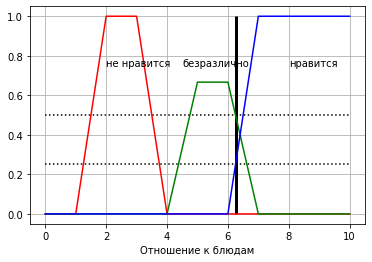

In [ ]:
attitude_low = [Attitude_to_dishes.low(i) for i in range(11)]
attitude_normal = [Attitude_to_dishes.normal(i) for i in range(11)]
attitude_high = [Attitude_to_dishes.high(i) for i in range(11)]

plt.plot(range(11), attitude_low, 'r')
plt.plot(range(11), attitude_normal, 'g')
plt.plot(range(11), attitude_high, 'b')

plt.xlabel("Отношение к блюдам")

plt.text(2, 0.75, 'не нравится')
plt.text(4.5, 0.75, 'безразлично')
plt.text(8, 0.75, 'нравится')

plt.vlines(6.25, 0, 1, linewidth=3)
plt.hlines(Attitude_to_dishes.high(6.25), 0, 10, linestyle=':', color='black')
plt.hlines(Attitude_to_dishes.normal(6.25), 0, 10, linestyle=':', color='black')

epsilon1 = Attitude_to_dishes.high(6.25)
epsilon2 = Attitude_to_dishes.normal(6.25)

plt.grid()

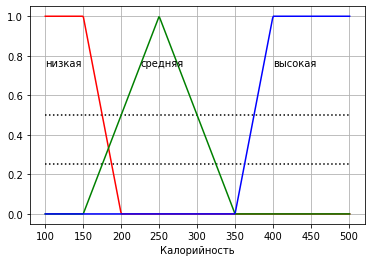

In [ ]:
calory_low = [Caloric.low(i) for i in np.linspace(100, 501, 400)]
calory_normal = [Caloric.normal(i) for i in np.linspace(100, 501, 400)]
calory_high = [Caloric.high(i) for i in np.linspace(100, 501, 400)]

plt.plot(np.linspace(100, 501, 400), calory_low, 'r')
plt.plot(np.linspace(100, 501, 400), calory_normal, 'g')
plt.plot(np.linspace(100, 501, 400), calory_high, 'b')

plt.xlabel("Калорийность")

plt.text(100, 0.75, 'низкая')
plt.text(225, 0.75, 'средняя')
plt.text(400, 0.75, 'высокая')

plt.hlines(epsilon1,100, 501, linestyle=':')
plt.hlines(epsilon2, 100, 501, linestyle=':')

plt.grid()

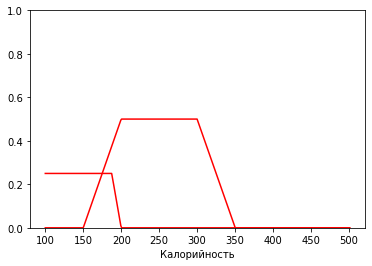

In [ ]:
new_calory_low = fuzz.fuzzy_and(np.linspace(100, 501, 400), calory_low, np.linspace(100, 501, 400), [epsilon1] * 400)[1]
new_calory_normal = fuzz.fuzzy_and(np.linspace(100, 501, 400), calory_normal, np.linspace(100, 501, 400), [epsilon2] * 400)[1]

plt.plot(np.linspace(100, 501, 400), new_calory_low, 'r')
plt.plot(np.linspace(100, 501, 400), new_calory_normal, 'r')
plt.ylim(0, 1)
plt.xlabel('Калорийность')
plt.show()

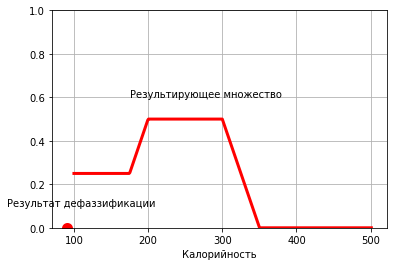

Результат дефаззификации:


90.62584635146771

In [ ]:
result_mamdani = fuzz.fuzzy_or(np.linspace(100, 501, 400), new_calory_low, np.linspace(100, 501, 400), new_calory_normal)[1]
plt.plot(np.linspace(100, 501, 400), result_mamdani, color='red', linewidth=3)
plt.grid()
plt.ylim(0, 1)

plt.xlabel('Калорийность')
defaz1 = fuzz.defuzz(np.linspace(100, 501, 400), result_mamdani, 'centroid')
plt.scatter(defaz1, 0, linewidth=5, color='red')
plt.text(175, 0.6, 'Результирующее множество')
plt.text(10, 0.1, 'Результат дефаззификации')
plt.show()

print('Результат дефаззификации:')
defaz1

Вывод Сугено

Комментарий: поскольку график строится по целым точкам, то точка 5,5, в которой достингается значение 1 игнорируется и график получается со срезанным верхним треугольником...

0.16666666666666696 0.75


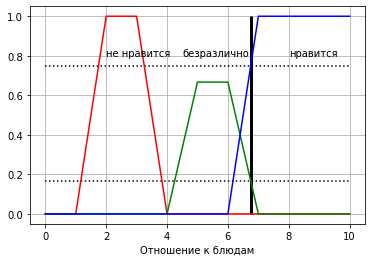

In [ ]:
attitude_low = [Attitude_to_dishes.low(i) for i in range(11)]
attitude_normal = [Attitude_to_dishes.normal(i) for i in range(11)]
attitude_high = [Attitude_to_dishes.high(i) for i in range(11)]

plt.plot(range(11), attitude_low, 'r')
plt.plot(range(11), attitude_normal, 'g')
plt.plot(range(11), attitude_high, 'b')

plt.xlabel("Отношение к блюдам")

plt.text(2, 0.8, 'не нравится')
plt.text(4.5, 0.8, 'безразлично')
plt.text(8, 0.8, 'нравится')

plt.vlines(6.75, 0, 1, linewidth=3)
plt.hlines(Attitude_to_dishes.high(6.75), 0, 10, linestyle=':', color='black')
plt.hlines(Attitude_to_dishes.normal(6.75), 0, 10, linestyle=':', color='black')

sigma1 = Attitude_to_dishes.high(6.75)
sigma2 = Attitude_to_dishes.normal(6.75)

print(sigma2, sigma1)

plt.grid()

Дополнение к базе

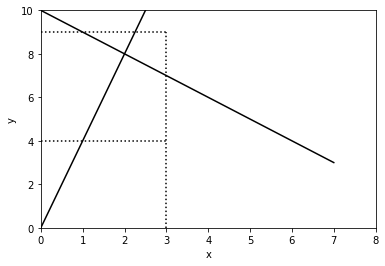

In [ ]:
def y11(x):
  return 4 * x
def y22(x):
  return 10 - x

line1 = [y11(i) for i in range(0, 10)]
line2 = [y22(i) for i in range(0, 8)]

plt.plot(range(0, 10), line1, color='black')
plt.plot(range(0, 8), line2, color='black')

plt.xlim(0, 8)
plt.ylim(0, 10)

plt.xlabel('x')
plt.ylabel('y')

plt.vlines(3, 0, 9, linestyle=':')
plt.hlines(y11(1), 0, 3, linestyle=':')
plt.hlines(y22(1), 0, 3, linestyle=':')

plt.show()

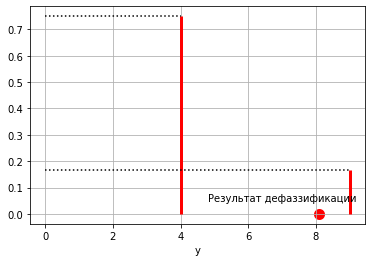

Результат дефаззификации:


8.093886462882095

In [ ]:
plt.vlines(y11(1), 0, sigma1, color='red', linewidth=3)
plt.vlines(y22(1), 0, sigma2, color='red', linewidth=3)
defaz2 = (4 * 0.166 + 9 * 0.75) / (0.166 + 0.75)

plt.scatter(defaz2, 0, linewidth=5, color='red')
plt.text(4.8, 0.05, 'Результат дефаззификации')
plt.hlines(sigma1, 0, y11(1), linestyle=':')
plt.hlines(sigma2, 0, y22(1), linestyle=':')
plt.xlabel('y')

plt.grid()
plt.show()

print('Результат дефаззификации:')
defaz2